<a href="https://colab.research.google.com/github/hidensuport/Hello-story-/blob/master/inclass6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv")
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [7]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 


In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,)], 
    "activation" : ['relu','logistic']
}

In [13]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5)]})

In [16]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (20, 5)}


In [20]:
print(grid.best_score_  )

0.05769795575957102


# 3.) Train a model with the optimal solution from GridSearch




In [37]:
p_dict = {
    "hidden_layer_sizes": (20,5), 
    "activation" : 'relu'
}

mlp_reg = MLPRegressor(**p_dict)

In [38]:
mlp_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(20, 5))

# 4.) What are the in-sample and out of sample MSEs

In [41]:

from sklearn.metrics import mean_squared_error
y_pred1 = mlp_reg.predict(X_train)

In [44]:
mean_squared_error(y_train,y_pred)

44822324.0353537

In [45]:
y_pred1 = mlp_reg.predict(X_test)

In [46]:
mean_squared_error(y_test,y_pred1)

44644855.57343331

In [ ]:
#in sample MSE 44822324, out sample mse 44644855

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [48]:
import keras.models

In [55]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense


In [58]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [64]:
model.compile(loss='mse', optimizer=Adam(lr=0.01))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [65]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 110872880.0000
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 110872888.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 110872896.0000
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 110872888.0000
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 110872856.0000
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 110872880.0000
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 110872840.0000
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 110872888.0000
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 110872848.0000
Epoch 10/100
200/200 [==============================] - 0s 1ms/step - loss: 110872896.0000
Epoch 11/100
200/200 [==============================] - 0s 1ms/step - loss: 110872848.0000
Epoch 12

In [89]:
keras.models.save_model(model,"/folder")


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”


In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                204       
                                                                 
 dense_7 (Dense)             (None, 12)                156       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


In [71]:
from tensorflow.keras.utils import  plot_model

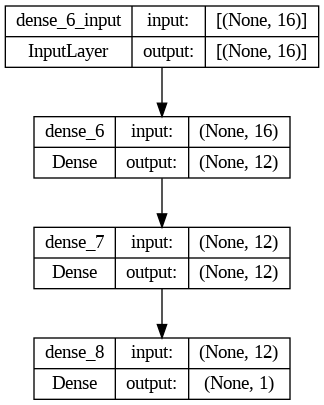

In [72]:
plot_model(model, show_shapes=True)

In [77]:
pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from ann_visualizer.visualize import ann_viz;

In [90]:
ann_viz(model, title = " ANN visualizer", filename = "/folder/nn_model.gz")

In [91]:
ann_viz

<function ann_visualizer.visualize.ann_viz(model, view=True, filename='network.gv', title='My Neural Network')>

In [93]:
import graphviz

In [96]:
g = graphviz.Source.from_file('network.gv')

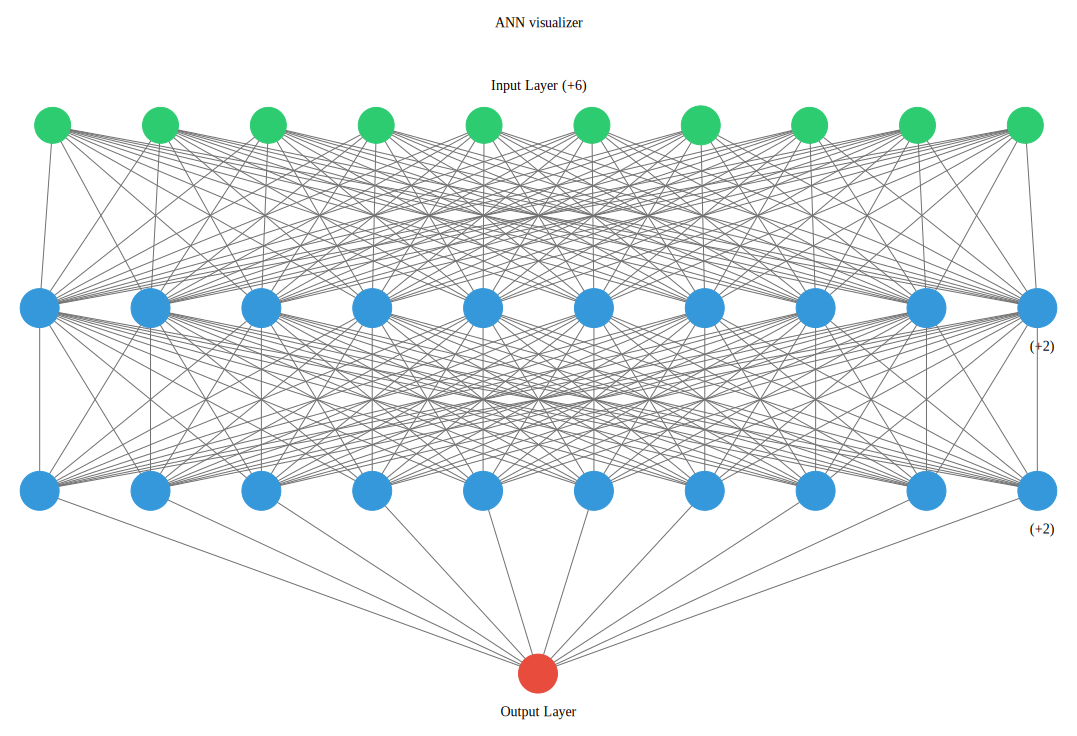

In [97]:
g